In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gsw
import xarray as xr
import toolbox
import cartopy as cart
import cartopy.crs as ccrs
import cmocean.cm as cmo
import seaborn as sns
from glob import glob
import matplotlib

In [2]:
shp_dict = {}
files = glob('../data/ne_10m_bathymetry_all/*.shp')
assert len(files) > 0
files.sort()
for f in files:
    depth = f.split('_')[-1].split('.')[0]
    # depth = '-' + f.split('_')[-1].split('.')[0]
    # depths.append(depth)
    nei = cart.io.shapereader.Reader(f)
    shp_dict[depth] = nei

depths = [d for d in shp_dict.keys()][::-1]
colors = sns.mpl_palette('cmo.ice_r', n_colors=8)
cmap   = sns.mpl_palette('cmo.ice', n_colors=8, as_cmap=True)

In [3]:
sim = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/backtrack_SA/SA_5179m_t365_no_no_no.nc')
diff = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/backtrack_SA/SA_5179m_t365_diff_no_no.nc')


In [7]:
sim

<xarray.Dataset>
Dimensions:           (traj: 1000, obs: 366)
Dimensions without coordinates: traj, obs
Data variables: (12/13)
    trajectory        (traj, obs) float64 0.0 0.0 0.0 0.0 ... 999.0 999.0 999.0
    time              (traj, obs) datetime64[ns] 2019-12-30T12:00:00 ... 2018...
    lat               (traj, obs) float64 -32.17 -32.14 -32.08 ... -36.87 -36.79
    lon               (traj, obs) float64 6.289 6.353 6.382 ... 10.05 10.13
    z                 (traj, obs) float64 5.179e+03 5.187e+03 ... 4.719e+03
    cons_temperature  (traj, obs) float32 0.7186 0.7165 0.7192 ... 0.6347 0.6548
    ...                ...
    mld               (traj, obs) float32 30.64 46.48 48.47 ... 25.4 25.29 15.03
    Kz                (traj, obs) float32 0.0006628 4.609e-05 ... 3.108e-05
    radius            (traj, obs) float32 5e-05 5e-05 5e-05 ... 5e-05 5e-05
    volume            (traj, obs) float32 5.236e-13 5.236e-13 ... 5.236e-13
    density           (traj, obs) float32 1.035e+03 1.028e+03 ... 1.028e+03
    v_s               (traj, obs) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        v2.3.0-71-g202ef087
    parcels_mesh:           spherical

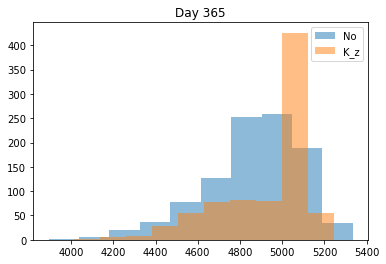

In [30]:
N=365
plt.hist(sim['z'][:, N],label='No', alpha=0.5)
plt.hist(diff['z'][:, N], label='K_z', alpha=0.5)
plt.title(f'Day {N}')
plt.legend()

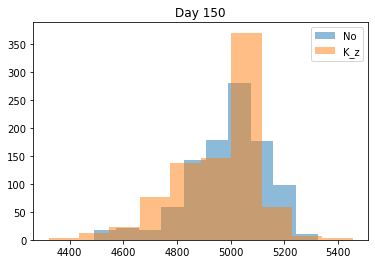

In [29]:
N=150
plt.hist(sim['z'][:, N],label='No', alpha=0.5)
plt.hist(diff['z'][:, N], label='K_z', alpha=0.5)
plt.title(f'Day {N}')
plt.legend()

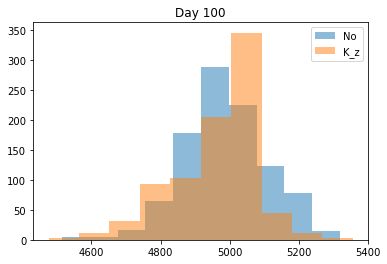

In [27]:
N=100
plt.hist(sim['z'][:, N],label='No', alpha=0.5)
plt.hist(diff['z'][:, N], label='K_z', alpha=0.5)
plt.title(f'Day {N}')
plt.legend()

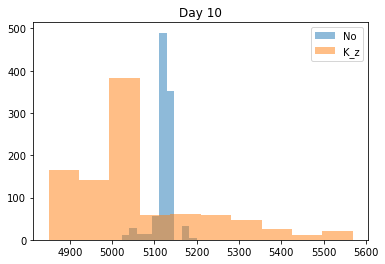

In [34]:
N=10
plt.hist(sim['z'][:, N],label='No', alpha=0.5)
plt.hist(diff['z'][:, N], label='K_z', alpha=0.5)
plt.title(f'Day {N}')
plt.legend()

Text(0.5, 1.0, '365 days no diffusion')

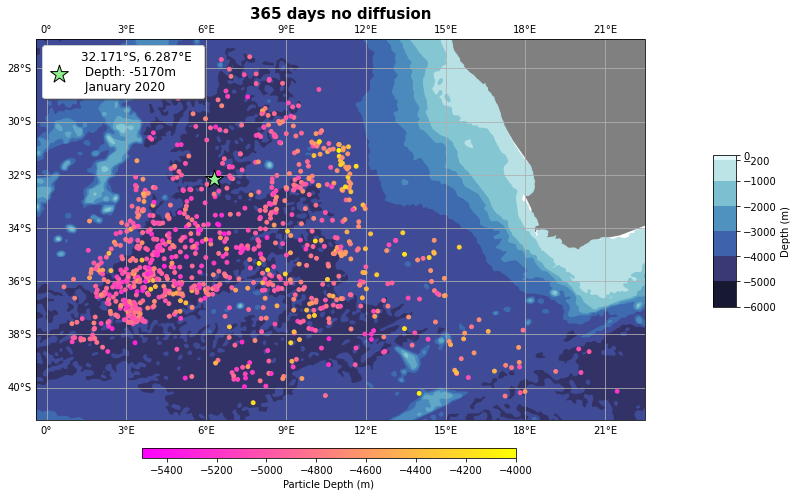

In [58]:
max_depth = -5500
min_depth = -4000

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.910,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)
    
im = ax.scatter(sim['lon'][:,-1], sim['lat'][:,-1], zorder=4, 
           c=-sim['z'][:,-1], s=15, cmap='spring', vmax=max_depth, vmin=min_depth)
ax.legend(loc='upper left', shadow=True, fontsize=12)

bar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle Depth (m)')
ax.set_title('365 days no diffusion', fontsize=15, weight='bold')
# plt.savefig('../figs/5170m_passive.png')

Text(0.5, 1.0, '365 days with diffusion')

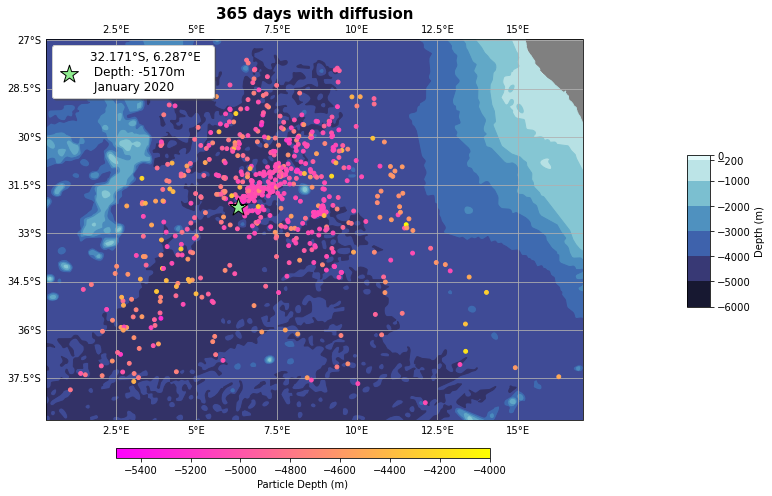

In [57]:
max_depth = -5500
min_depth = -4000

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.910,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)
    
im = ax.scatter(diff['lon'][:,-1], diff['lat'][:,-1], zorder=4, 
           c=-diff['z'][:,-1], s=15, cmap='spring', vmax=max_depth, vmin=min_depth)
ax.legend(loc='upper left', shadow=True, fontsize=12)

bar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle Depth (m)')
ax.set_title('365 days with diffusion', fontsize=15, weight='bold')
# plt.savefig('../figs/5170m_passive.png')